In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns


In [49]:
listings_df = pd.read_csv('./listings.csv')
listings_df.describe()

,id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3114.000000,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.020000e+13,2.492311e+07,0.949891,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,0.125177,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.020000e+13,4.240000e+03,0.000000,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.020000e+13,6.103425e+06,0.970000,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.020000e+13,1.928100e+07,1.000000,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.020000e+13,3.622147e+07,1.000000,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.020000e+13,9.385411e+07,1.000000,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [50]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   float64
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [51]:
listings_df_clean = listings_df[['id', 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                                'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified',
                                'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
                                'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                'maximum_nights', 'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 
                                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                 'review_scores_value', 'requires_license', 'instant_bookable', 'cancellation_policy', 'reviews_per_month']]
listings_df_clean['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [52]:
ratings_clean = listings_df_clean.dropna(axis = 0, subset= ['review_scores_rating','host_response_rate'])
ratings_clean.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,reviews_per_month
1,3075044,2572247,6/7/2012,within an hour,1.0,100%,f,Roslindale,1,1,...,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,1.30
2,6976,16701,5/11/2009,within a few hours,1.0,88%,t,Roslindale,1,1,...,10.0,9.0,10.0,10.0,9.0,10.0,f,f,moderate,0.47
3,1436513,6031442,4/21/2013,within a few hours,1.0,50%,f,NaN,1,1,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,1.00
4,7651065,15396970,5/11/2014,within an hour,1.0,100%,t,Roslindale,1,1,...,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,2.25
5,12386020,64200298,3/23/2016,within a few hours,1.0,95%,t,Roslindale,2,2,...,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,1.70


1) Property types (pie chart)
2) Same number of rooms/ map with prices(map) Jewell
3) Host response time vs ratings (scatter)
4) Price by neighborhood (box & whisker)
5) Availability vs ratings (scatter)
6) Cancelation policy (chart by doing groupby cancellation policy and mean of ratings(bar chart))(Alexis)
7) Ratings by Property Type (bar chart)
8) Price by property types

After we analyze correlation, choose top 5 and check amount of reviews per year.
If I was purchasing a porperty for Airbnb in Boston:
We think _ is the best neighbborhood is _ 
 1) what is the highest rated property type
 2) best practices of being a property owner are response time, availability, cancellation policy in correlation with ratings
 3) Best neighborhood to purchase in _

In [53]:
# Property types pie chart
prop = ratings_clean['property_type'].unique()
prop_type = ratings_clean.dropna(axis = 0, subset= ['property_type'])

# Collapsing smallest four property types into other
prop_type = prop_type.replace({'Villa': 'Other', 'Dorm': 'Other', 'Entire Floor': 'Other', 'Guesthouse': 'Other' })

prop_count = prop_type['property_type'].value_counts()
count = list(prop_count)
count

[1804, 451, 169, 45, 28, 28, 14, 11]

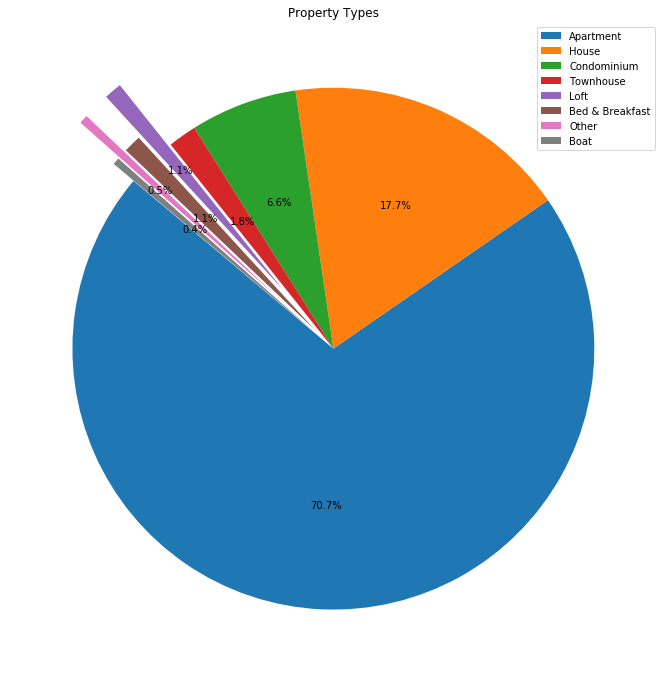

In [54]:
#Plot a Pie chart of property type distribution
#colors = ['pink', 'green', '']
explode = (0,0,0,0,0.3,0.1,0.3,0.1)
labels = (prop_count.index)
prop_pie = prop_count.plot.pie(y=count, figsize=(12,12), startangle=140, explode = explode, autopct="%1.1f%%", labeldistance = None, title = "Property Types")
plt.xlabel("")
plt.ylabel("")
plt.legend(labels, loc = "upper right")

In [55]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Property Type')

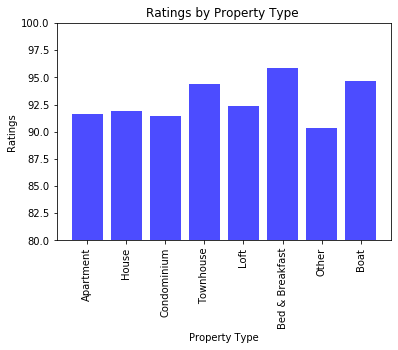

In [56]:
# Group data by Property Type and finding the mean of all columns
bar1_data = prop_type.groupby(['property_type']).mean()
bar1_data

y_axis = bar1_data["review_scores_rating"]
x_axis = labels
plt.bar(x_axis, y_axis, color='b', alpha=0.7, align='center')
plt.title("Ratings by Property Type ")
plt.ylim(80, 100)
plt.xticks(rotation = 'vertical')
plt.ylabel("Ratings")
plt.xlabel("Property Type")

Text(0.5, 1.0, 'Price By Property Type')

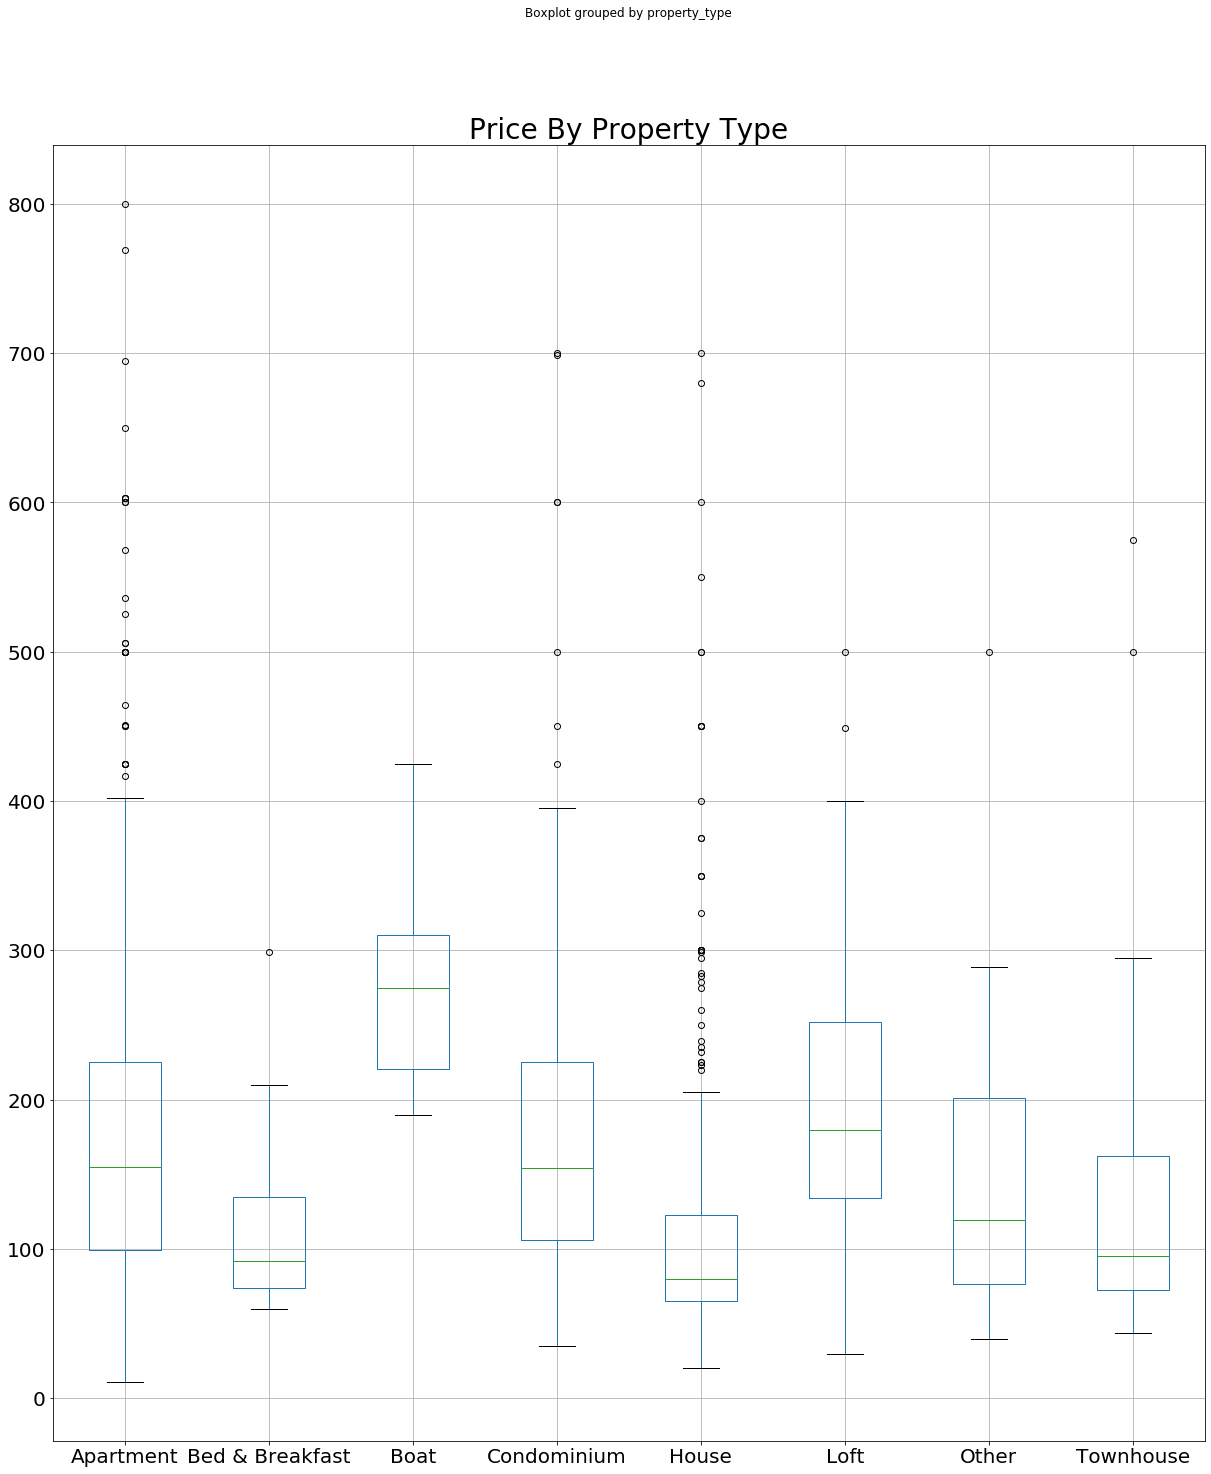

In [57]:
#create boxplot to compare property types and price 
prop_type = prop_type.loc[prop_type["bedrooms"] <=3]
prop_type.boxplot("price", by= "property_type", figsize= (20,24), fontsize= 20)
plt.xlabel("")
plt.ylabel("")
plt.title("Price By Property Type", fontsize= 28)
#explain the 3 bedrooms in presentation

Text(0.5, 1.0, 'Price By Neighborhood')

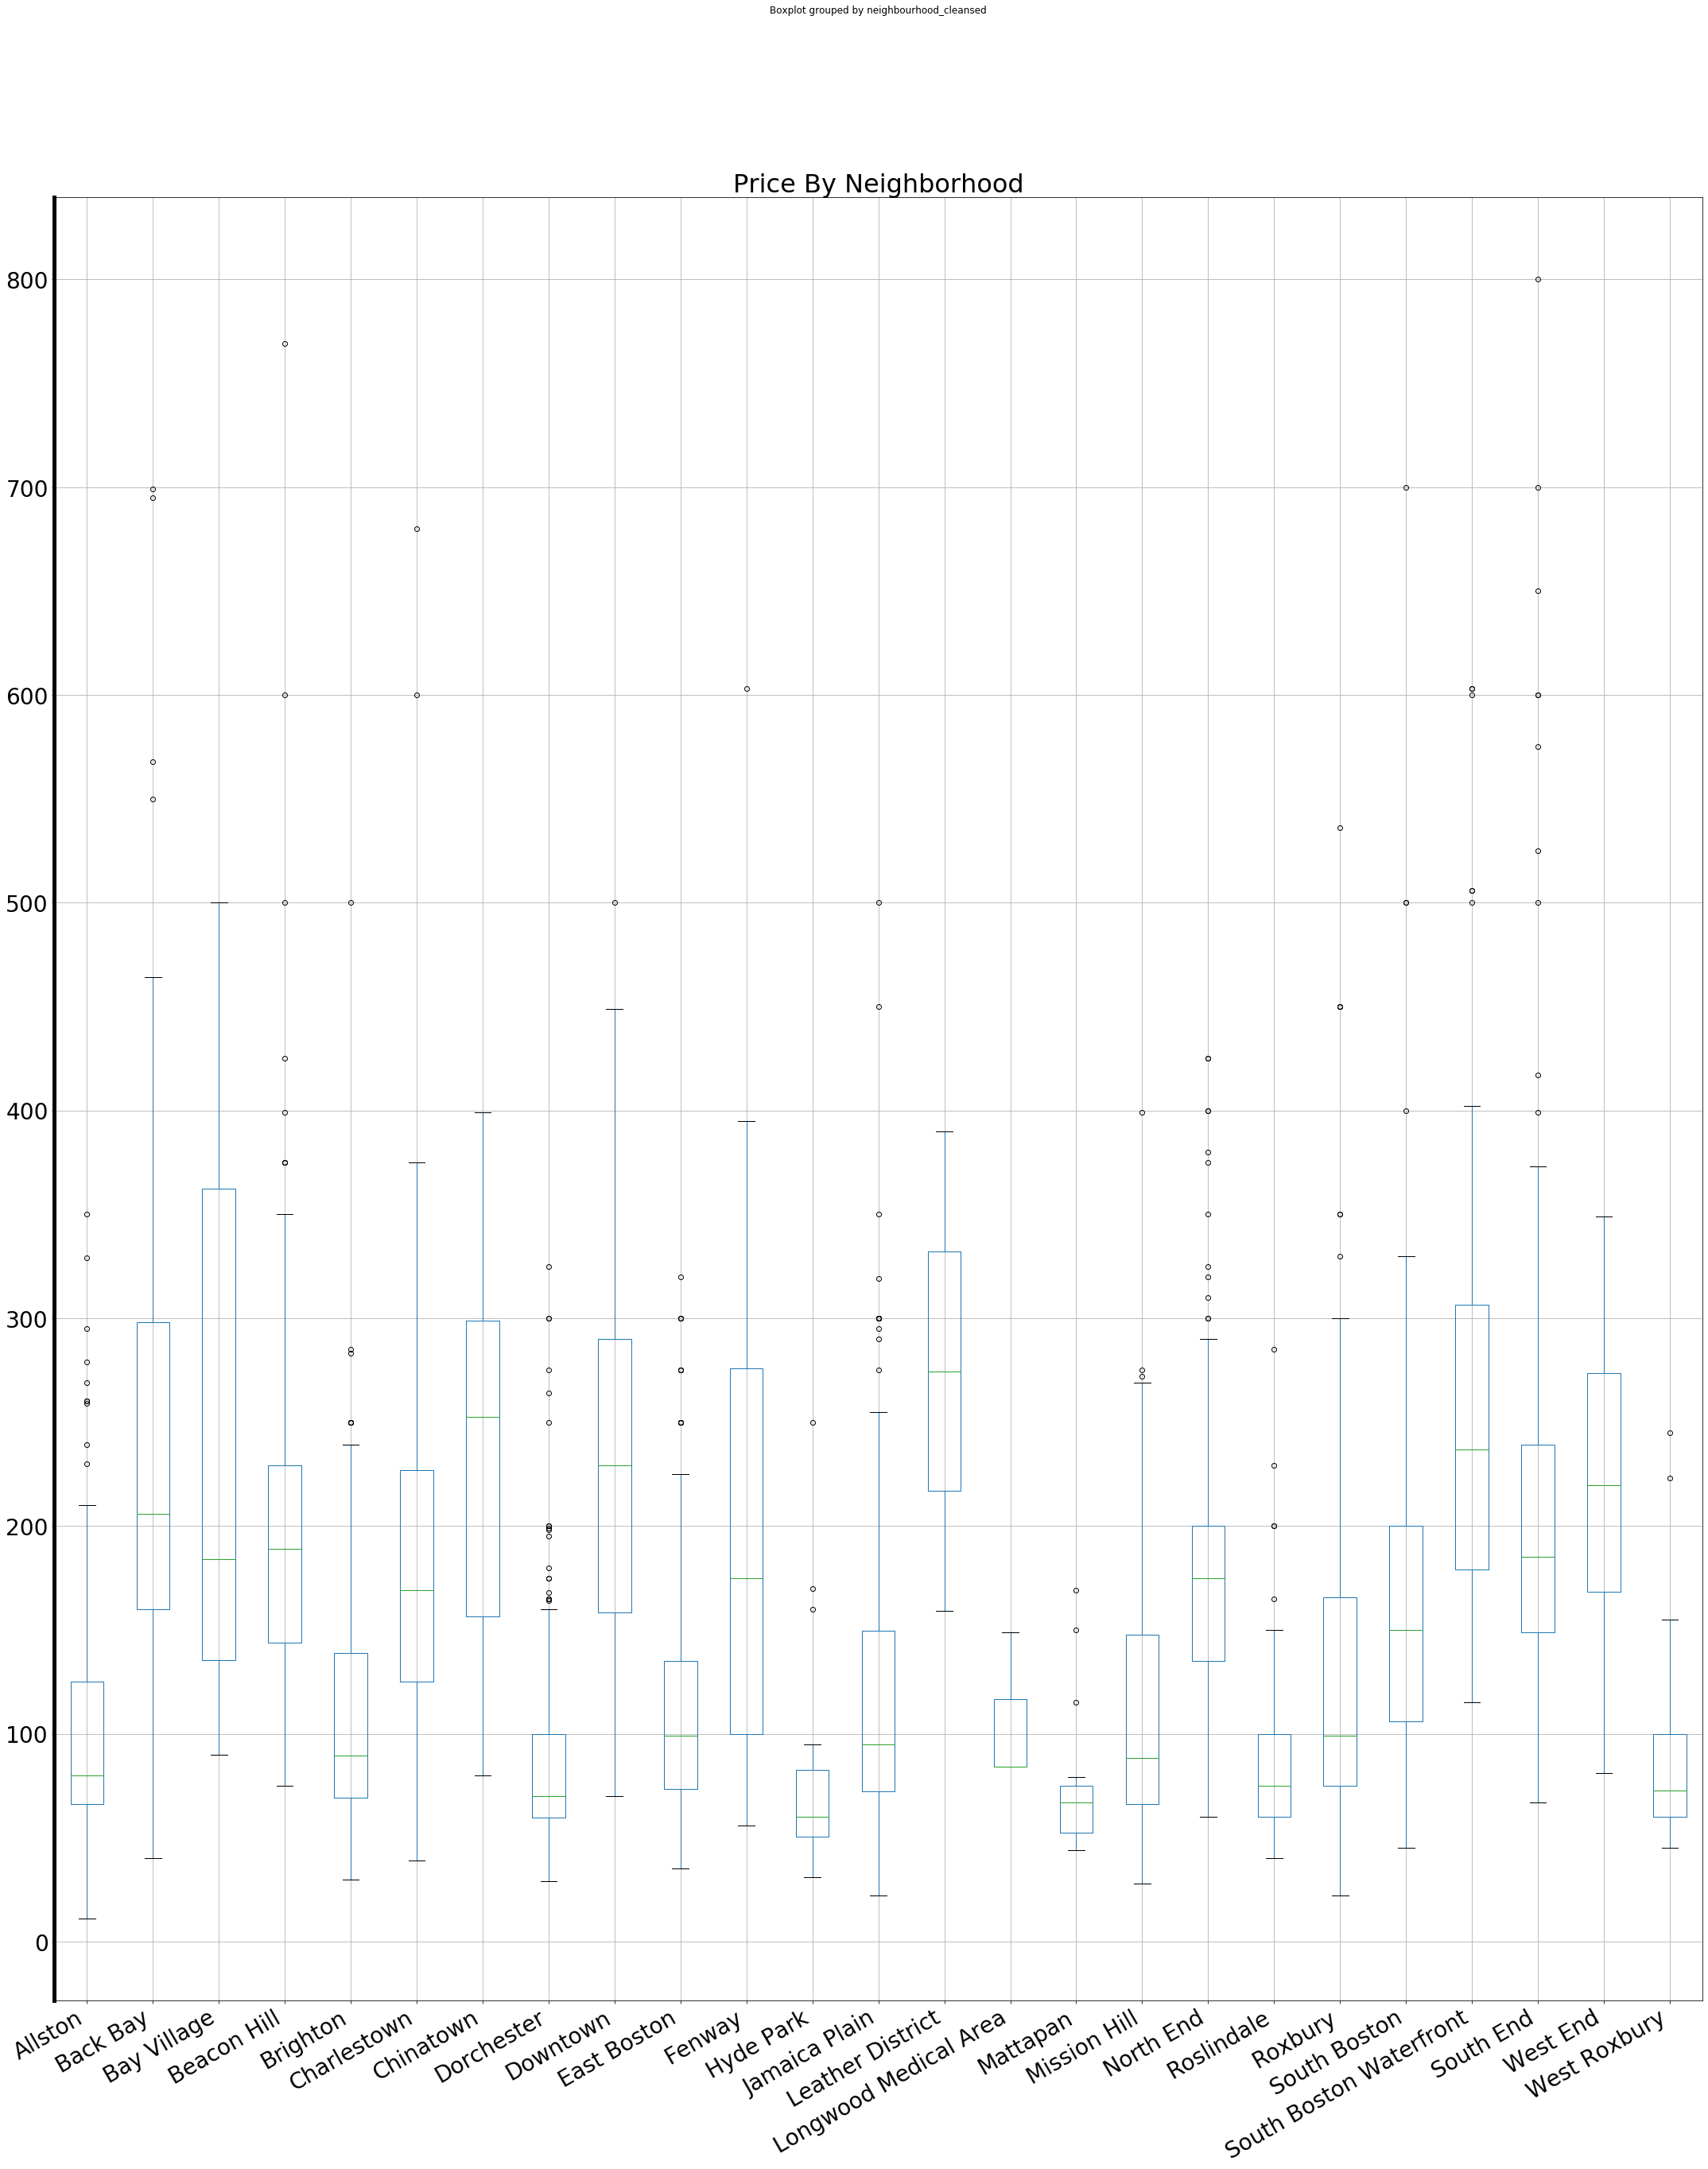

In [58]:
prop_price = prop_type.loc[prop_type["price"] <=800]
prop = prop_price.boxplot("price", by= "neighbourhood_cleansed", figsize= (36,42), fontsize= 28)
#prop_price(lwd=3)
#plt.gca('linew',2)
prop.spines['left'].set_linewidth(5)
#prop.spines['right'].set_linewidth(5)
#lines.linewidth: 5
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel("")
plt.ylabel("")
plt.title("Price By Neighborhood", fontsize= 32)

In [59]:
prop_type["neighbourhood_cleansed"].value_counts()

Jamaica Plain              254
South End                  238
Back Bay                   216
Dorchester                 211
Fenway                     172
Beacon Hill                155
Allston                    145
South Boston               134
East Boston                127
Brighton                   118
Downtown                   110
Roxbury                    108
North End                  105
Mission Hill                70
Charlestown                 67
South Boston Waterfront     56
Roslindale                  49
Chinatown                   40
West Roxbury                30
West End                    26
Hyde Park                   23
Mattapan                    18
Bay Village                 16
Longwood Medical Area        3
Leather District             2
Name: neighbourhood_cleansed, dtype: int64

Text(0, 0.5, 'Ratings')

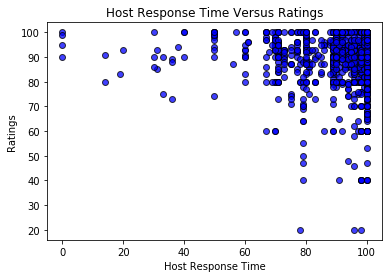

In [60]:
#Host response time vs ratings (scatter)
prop_try = prop_type["host_response_rate"]*100
x_value= prop_try 
y_value= prop_type["review_scores_rating"]
plt.scatter(x_value, y_value, facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Host Response Time Versus Ratings")
plt.xlabel("Host Response Time")
plt.ylabel("Ratings")

Text(0, 0.5, 'Ratings')

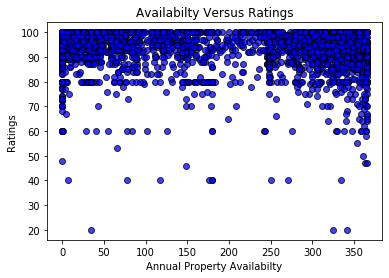

In [61]:
#Availability vs ratings (scatter)
#null hypothesis
x_value= prop_type["availability_365"]
y_value= prop_type["review_scores_rating"]
plt.scatter(x_value, y_value, facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Availabilty Versus Ratings")
plt.xlabel("Annual Property Availabilty")
plt.ylabel("Ratings")